In [1]:
#loading the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This is to remove the warnings if we are getting any
from warnings import filterwarnings
filterwarnings('ignore')

## Loading the train and test dataset

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Description about the data

1. `Item_Identifier`: Unique product ID.


2. `Item_Weight`: Weight of product.


3. `Item_Fat_Content`: Whether the product is low fat or not.


4. `Item_Visibility`: The % of total display area of all products in a store allocated to the particular product


5. `Item_Type`: The category to which the product belongs.


6. `Item_MRP`: Maximum Retail Price (list price) of the product.


7. `Outlet_Identifier`: Unique store ID.


8. `Outlet_Establishment_Year`: The year in which store was established.


9. `Outlet_Size`: The size of the store in terms of ground area covered.


10. `Outlet_Location_Type`: The type of city in which the store is located.


11. `Outlet_Type`: Whether the outlet is just a grocery store or some sort of supermarket.


12. `Item_Outlet_Sales`: Sales of the product in the particulat store. This is the outcome variable to be predicted.


# Exploratory Data Analysis

### In Data Analysis We will Analyze To Find out the below stuff

1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(SalePrice)


## Checking shapes of dataframe

In [3]:
train.shape

(8523, 12)

In [4]:
test.shape

(5681, 11)

## Stats of data

In [5]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Here we can see that - 

1. The minimum MRP of an item is `31.29` year and maximum MRP for an item is `266.88`.
2. The minimum sale for an item is `33.29` and maximum Sale for an item is `13086.96`.


# Features with Nan
Finding features which has nan values and also counting the number of nan values in it

In [6]:
# features with na
na_features_train = [features for features in train.columns if (train[features].isna().sum()>0)]
na_features_test = [features for features in test.columns if (test[features].isna().sum()>0)]

print(na_features_train)
print(na_features_test)
print()


#count of features with na
na_features_train_count = {features:train[features].isna().sum() for features in na_features_train}
na_features_test_count = {features:test[features].isna().sum() for features in na_features_test}

print(na_features_train_count)
print(na_features_test_count)

['Item_Weight', 'Outlet_Size']
['Item_Weight', 'Outlet_Size']

{'Item_Weight': 1463, 'Outlet_Size': 2410}
{'Item_Weight': 976, 'Outlet_Size': 1606}


### Checking relationship of null values and target value

What I am doing here is replacing the null values with 1 and non null values with 0.

Then I am grouping the 1 and 0 with respect to the target variable i.e. Sales and finding the mean and finally plotting them to see if it is needed for Sales or not.

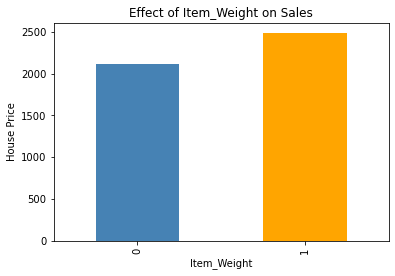

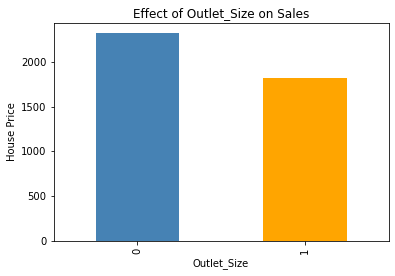

In [7]:
df = train.copy()

for features in na_features_train:
    df[features] = np.where(df[features].isna(),1,0)
    df.groupby(features)['Item_Outlet_Sales'].mean().plot.bar(color = ['steelblue','orange'])
    plt.ylabel('House Price')
    plt.title(f'Effect of {features} on Sales')
    plt.show()

# Observation- 
We can see that we have some null values in `item_weight` and `outlet_size` but after plotting the graph it is clear that we can not drop those rows because they are contributing in increase sales of the product.
Hence, we can see further what we can do with it.

## Numerical Features

In [8]:
df = train.copy()
df1 = test.copy()

numerical_features_train = df.select_dtypes(exclude='O').columns
numerical_features_test = df1.select_dtypes(exclude='O').columns

print(numerical_features_train)
print(numerical_features_test)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')
Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


### DIscrete numerical features

As this is a small dataset we can manually see that there are `no discrete variable`.

But we have a datetime feature we are considering as a `Temporal` variable.

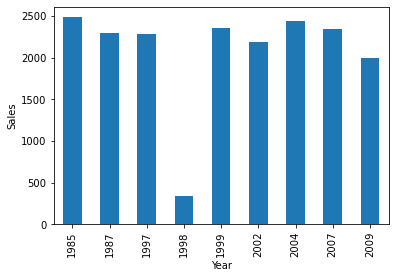

In [9]:
# let's analyze the temporal variable vs Sales
df = train.copy()

mean_year = df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

# Observation - 

1. The stores which was established in `1998` has the lowest sales.
2. The stores which was established in `1985` has the highest sales.


### Continuous numerical features

In [10]:
continuous_numerical_features_train= [features for features in numerical_features_train if features != 'Outlet_Establishment_Year']
continuous_numerical_features_test = [features for features in numerical_features_test  if features != 'Outlet_Establishment_Year']

print(continuous_numerical_features_train)
print(continuous_numerical_features_test)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
['Item_Weight', 'Item_Visibility', 'Item_MRP']


### Checking the distribution of numerical features

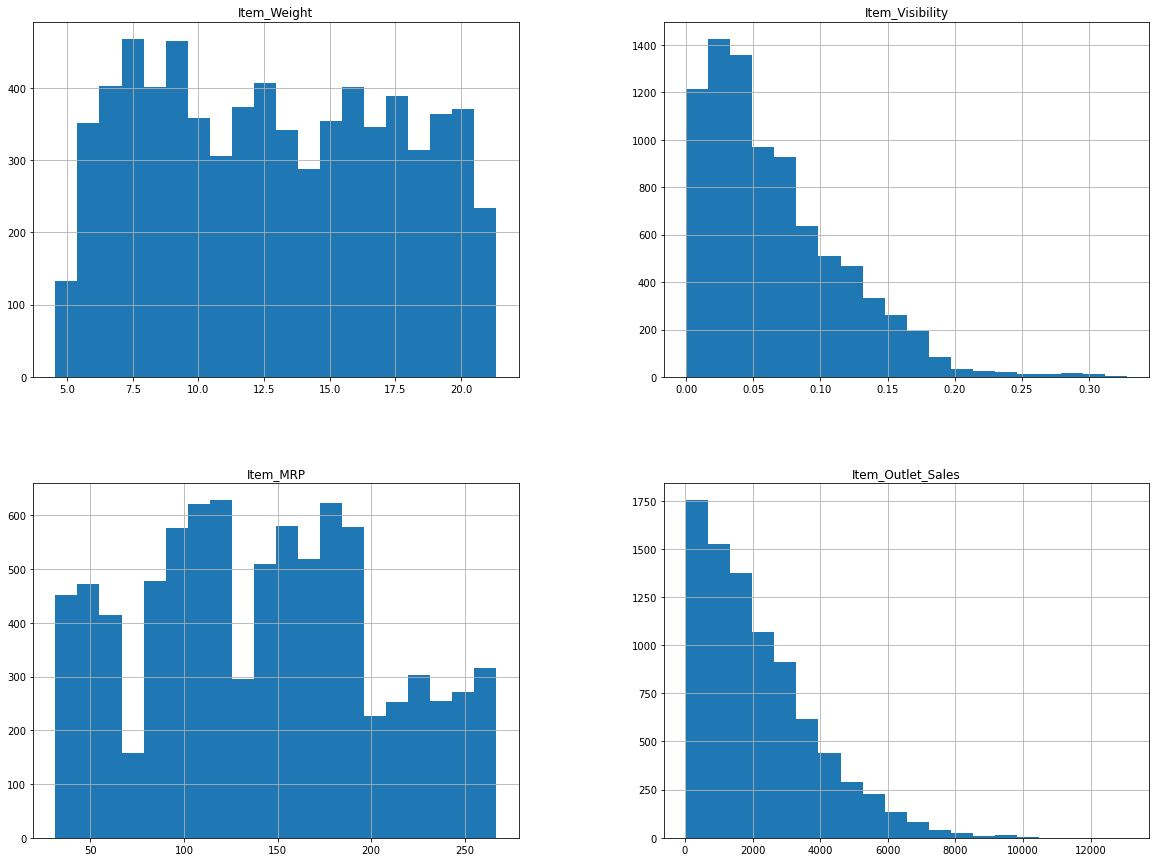

In [11]:
df = train.copy()
df[continuous_numerical_features_train].hist(bins=20,figsize=(20,15))
plt.show()

## Checking outlier

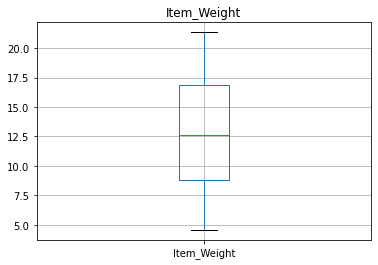

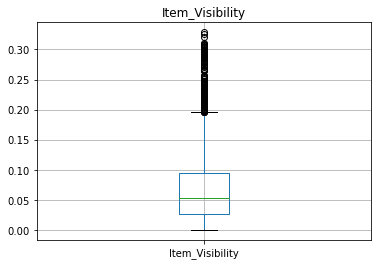

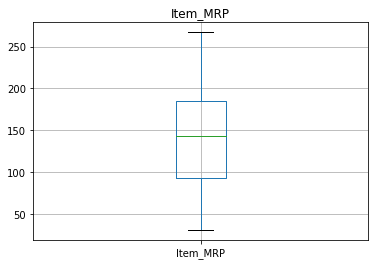

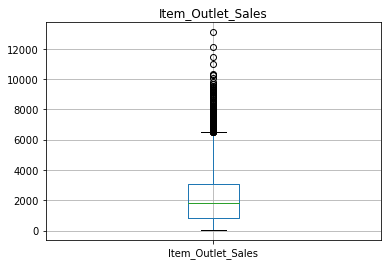

In [12]:
df = train.copy()
for features in continuous_numerical_features_train:
    df.boxplot(column=features)
    plt.title(features)
    plt.show()

We can see that there are some outliers in `item visibility`

## Categorical Features

In [13]:
df = train.copy()
df1 = test.copy()

categorical_features_train = df.select_dtypes(include='O').columns
categorical_features_test = df1.select_dtypes(include='O').columns

print(categorical_features_train)
print(categorical_features_test)

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')
Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


In [14]:
ordinal_categorical_features = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']
nominal_categorical_features = ['Item_Type','Outlet_Type']

## Cardinality of categorical features

In [15]:
categories_count_train = {features:len(df[features].unique()) for features in categorical_features_train}
categories_count_train = dict(sorted(categories_count_train.items(), key = lambda ele: ele[1]))
print(categories_count_train)


categories_count_test = {features:len(df1[features].unique()) for features in categorical_features_test}
categories_count_test = dict(sorted(categories_count_test.items(), key = lambda ele: ele[1]))
print(categories_count_test)

{'Outlet_Location_Type': 3, 'Outlet_Size': 4, 'Outlet_Type': 4, 'Item_Fat_Content': 5, 'Outlet_Identifier': 10, 'Item_Type': 16, 'Item_Identifier': 1559}
{'Outlet_Location_Type': 3, 'Outlet_Size': 4, 'Outlet_Type': 4, 'Item_Fat_Content': 5, 'Outlet_Identifier': 10, 'Item_Type': 16, 'Item_Identifier': 1543}


### Checking relationship of these features with target

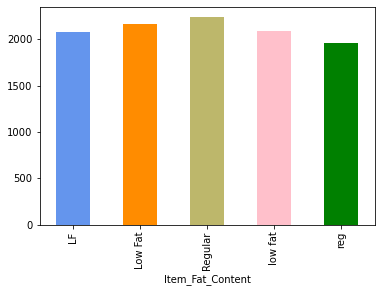

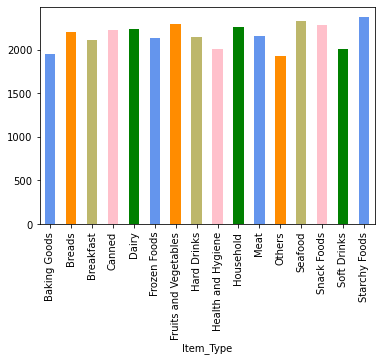

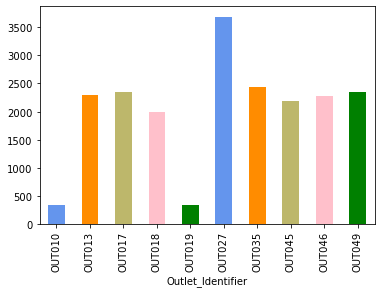

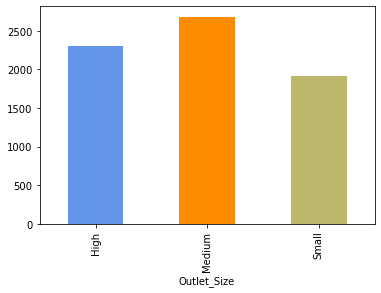

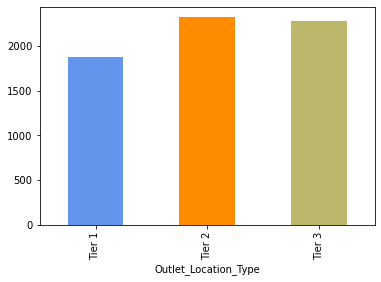

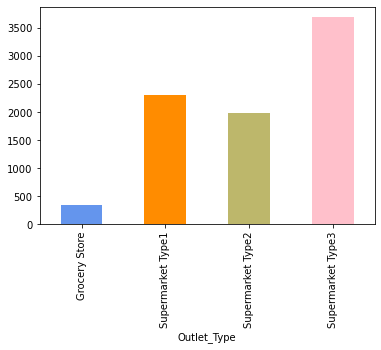

In [16]:
for features in categorical_features_train:
    if features != 'Item_Identifier':
        df.groupby(features)['Item_Outlet_Sales'].mean().plot(kind='bar',color=['cornflowerblue','darkorange','darkkhaki','pink','green'])
        plt.show()

# Observation -

1. Item which has `Regular Fat` are sold more.

2. Some products like - `Breads`, `Dairy`, `Fruits and Vegetables`, `Household`, `Seafood`, `Starchy Foods` are sold more.

3. There is more sale in outlets which are of `medium` size.

4. Oulets which are located in `tier 2` cities have more sales.

5. There are more sales from `Supermarket`.

## Checking Correlation

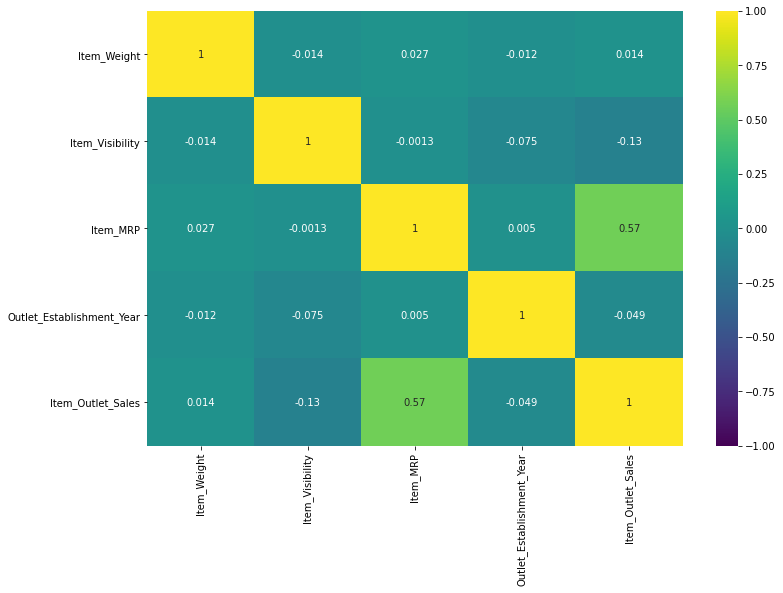

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(),annot=True,vmin=-1,vmax=1,cmap='viridis')
plt.show()

No two features are hoghly correlated and hence we can assume our features to be `indpendent`.

# Feature Engineering

### Combining train and test dataset

In [18]:
# train = train.set_index('Outlet_Identifier')
# test = test.set_index('Outlet_Identifier')

In [19]:
# df = pd.concat([train,test],axis=0)
# df

Item fat content shows that whether the item contains low fat or not but in the data we have different name for the same options like - 

1. `LF` and `low fat` for `Low Fat`.
2. `reg` for `Regular`.

So i will be replacing them with their corresponding names

In [20]:
print(train['Item_Fat_Content'].unique())
print(test['Item_Fat_Content'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Low Fat' 'reg' 'Regular' 'LF' 'low fat']


### Making a function for the same

In [21]:
def change_names(text):
    new_text = ''
    if (text == 'low fat') or (text == 'LF'):
        new_text = 'Low Fat'
    elif (text == 'reg'):
        new_text = 'Regular'
    else:
        new_text = text
        
    return new_text

In [22]:
# Applying the function to train and test dataset

train['Item_Fat_Content'] = train['Item_Fat_Content'].apply(change_names)
test['Item_Fat_Content'] = test['Item_Fat_Content'].apply(change_names)

In [23]:
print(train['Item_Fat_Content'].unique())
print(test['Item_Fat_Content'].unique())

['Low Fat' 'Regular']
['Low Fat' 'Regular']


Now we can see that we have only 2 category - Low fat and regular

## Handling Missing values

In [24]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [25]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### Filling Item weight with it's mean

We are not using `median` because we do not have any outliers in it.

In [26]:
# Train
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())

# Test
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())

### Filling Outlet Size

What I am doing here is Grouping the Outlet location with Outlet size and figuring out that Which location has which type of store(The count).

In [27]:
train.groupby('Outlet_Location_Type')['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Size
Tier 1                Small          1458
                      Medium          930
Tier 2                Small           930
Tier 3                Medium         1863
                      High            932
Name: Outlet_Size, dtype: int64

In [28]:
test.groupby('Outlet_Location_Type')['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Size
Tier 1                Small           972
                      Medium          620
Tier 2                Small           620
Tier 3                Medium         1242
                      High            621
Name: Outlet_Size, dtype: int64

From this data we can see that - 

1. Tier 1 has more `Small` outlets.
2. Tier 2 has only `Small` outlets.
3. Tier 3 has more `Medium` outlets.

In [29]:
col = 'Outlet_Location_Type'

conditions_train  = [ (train[col] == 'Tier 1'),(train[col] == 'Tier 2'),(train[col] == 'Tier 3')]
conditions_test  = [ (test[col] == 'Tier 1'),(test[col] == 'Tier 2'),(test[col] == 'Tier 3')]

choices     = [ "Small", 'Small', 'Medium' ]
    
train["Outlet_Size"] = np.select(conditions_train, choices, default=np.nan)
test["Outlet_Size"] = np.select(conditions_test, choices, default=np.nan)

In [30]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [31]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Now we can see that there are no null values in our dataset.

In [32]:
# Dropping column which is of no use.

train = train[['Item_Type','Item_MRP','Outlet_Type','Item_Outlet_Sales']]
test = test[['Item_Type','Item_MRP','Outlet_Type']]

In [33]:
train

,Item_Type,Item_MRP,Outlet_Type,Item_Outlet_Sales
0,Dairy,249.8092,Supermarket Type1,3735.1380
1,Soft Drinks,48.2692,Supermarket Type2,443.4228
2,Meat,141.6180,Supermarket Type1,2097.2700
3,Fruits and Vegetables,182.0950,Grocery Store,732.3800
4,Household,53.8614,Supermarket Type1,994.7052
...,...,...,...,...
8518,Snack Foods,214.5218,Supermarket Type1,2778.3834
8519,Baking Goods,108.1570,Supermarket Type1,549.2850
8520,Health and Hygiene,85.1224,Supermarket Type1,1193.1136
8521,Snack Foods,103.1332,Supermarket Type2,1845.5976


# One hot encoding

This is for `Nominal categorical` variables.

In [34]:
# Train
for features in nominal_categorical_features:
    # Train
    dummy = pd.get_dummies(train[features],drop_first=True)
    train = pd.concat([train,dummy],axis=1)
    train.drop(features,axis=1,inplace=True)
    
    # Test
    dummy1 = pd.get_dummies(test[features],drop_first=True)
    test = pd.concat([test,dummy1],axis=1)
    test.drop(features,axis=1,inplace=True)

In [35]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# # Train
# train['Outlet_Location_Type'] = le.fit_transform(train['Outlet_Location_Type'])
# print(features, le.classes_)

# # Test
# test['Outlet_Location_Type'] = le.transform(test['Outlet_Location_Type'])
# print(features, le.classes_)
# print()

In [36]:
train.head()

,Item_MRP,Item_Outlet_Sales,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,249.8092,3735.1380,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,48.2692,443.4228,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,141.6180,2097.2700,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,182.0950,732.3800,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,53.8614,994.7052,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [37]:
test.head()

,Item_MRP,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,107.8622,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,87.3198,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,241.7538,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,155.0340,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,234.2300,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [38]:
train.corr().T

,Item_MRP,Item_Outlet_Sales,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_MRP,1.000000,0.567574,-0.000112,0.001460,-0.005666,0.035551,-0.013358,0.023688,-0.010089,-0.041646,0.046815,-0.004086,-0.018595,0.001186,0.033817,-0.035808,0.014613,0.004885,0.003850,-0.006714
Item_Outlet_Sales,0.567574,1.000000,0.002332,-0.004656,0.007387,0.008858,-0.009482,0.025950,-0.003956,-0.025587,0.015701,-0.002995,-0.021267,0.007380,0.022782,-0.024040,0.015039,0.108765,-0.038059,0.311192
Breads,-0.000112,0.002332,1.000000,-0.019918,-0.050010,-0.051373,-0.058204,-0.071605,-0.027955,-0.044402,-0.060225,-0.039906,-0.024776,-0.015152,-0.070514,-0.040885,-0.023156,-0.006189,-0.000734,0.007693
Breakfast,0.001460,-0.004656,-0.019918,1.000000,-0.032828,-0.033723,-0.038207,-0.047004,-0.018351,-0.029147,-0.039533,-0.026195,-0.016264,-0.009946,-0.046288,-0.026838,-0.015201,-0.008695,0.000077,-0.003550
Canned,-0.005666,0.007387,-0.050010,-0.032828,1.000000,-0.084670,-0.095929,-0.118015,-0.046074,-0.073181,-0.099258,-0.065770,-0.040834,-0.024972,-0.116217,-0.067383,-0.038165,0.001236,0.010418,0.001136
Dairy,0.035551,0.008858,-0.051373,-0.033723,-0.084670,1.000000,-0.098544,-0.121232,-0.047330,-0.075176,-0.101965,-0.067563,-0.041947,-0.025653,-0.119386,-0.069220,-0.039205,0.003396,-0.001746,-0.010817
Frozen Foods,-0.013358,-0.009482,-0.058204,-0.038207,-0.095929,-0.098544,1.000000,-0.137352,-0.053624,-0.085173,-0.115523,-0.076547,-0.047525,-0.029064,-0.135260,-0.078425,-0.044418,0.009750,-0.001507,-0.006128
Fruits and Vegetables,0.023688,0.025950,-0.071605,-0.047004,-0.118015,-0.121232,-0.137352,1.000000,-0.065970,-0.104782,-0.142120,-0.094171,-0.058467,-0.035755,-0.166402,-0.096481,-0.054645,-0.000811,0.000919,0.005173
Hard Drinks,-0.010089,-0.003956,-0.027955,-0.018351,-0.046074,-0.047330,-0.053624,-0.065970,1.000000,-0.040908,-0.055485,-0.036765,-0.022826,-0.013959,-0.064965,-0.037667,-0.021334,0.007837,-0.003132,-0.001143
Health and Hygiene,-0.041646,-0.025587,-0.044402,-0.029147,-0.073181,-0.075176,-0.085173,-0.104782,-0.040908,1.000000,-0.088129,-0.058396,-0.036255,-0.022172,-0.103186,-0.059828,-0.033885,-0.005422,0.002174,0.004634


In [39]:
X = train.drop(columns=['Item_Outlet_Sales'])
y = train['Item_Outlet_Sales']
X_test = test

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
#Scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns = X.columns)
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid),columns= X.columns)

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_valid_scaled)

In [43]:
model.score(X_valid_scaled,y_valid)

0.5786518103344511

In [44]:
# Prediction of test data

In [45]:
y_pred1 = model.predict(X_test)

In [50]:
import pickle
pickle.dump(model,open('Big Mart.pkl','wb'))

In [49]:
X_train_scaled

,Item_MRP,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0.470709,-0.169311,-0.113026,-0.285244,-0.292101,-0.333116,2.40923,-0.166075,-0.252619,-0.349985,-0.223727,-0.144262,-0.084203,-0.407515,-0.234019,-0.138322,0.730420,-0.352093,-0.354457
1,0.457877,-0.169311,-0.113026,-0.285244,-0.292101,-0.333116,-0.41507,-0.166075,-0.252619,2.857268,-0.223727,-0.144262,-0.084203,-0.407515,-0.234019,-0.138322,0.730420,-0.352093,-0.354457
2,-0.482625,-0.169311,-0.113026,-0.285244,-0.292101,-0.333116,-0.41507,-0.166075,-0.252619,-0.349985,4.469727,-0.144262,-0.084203,-0.407515,-0.234019,-0.138322,0.730420,-0.352093,-0.354457
3,-1.603553,-0.169311,-0.113026,-0.285244,-0.292101,-0.333116,2.40923,-0.166075,-0.252619,-0.349985,-0.223727,-0.144262,-0.084203,-0.407515,-0.234019,-0.138322,0.730420,-0.352093,-0.354457
4,0.218375,-0.169311,-0.113026,-0.285244,-0.292101,-0.333116,-0.41507,-0.166075,-0.252619,-0.349985,-0.223727,-0.144262,-0.084203,2.453900,-0.234019,-0.138322,0.730420,-0.352093,-0.354457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,-0.043511,-0.169311,-0.113026,-0.285244,-0.292101,-0.333116,2.40923,-0.166075,-0.252619,-0.349985,-0.223727,-0.144262,-0.084203,-0.407515,-0.234019,-0.138322,-1.369075,-0.352093,-0.354457
6814,-1.059078,-0.169311,-0.113026,-0.285244,-0.292101,3.001957,-0.41507,-0.166075,-0.252619,-0.349985,-0.223727,-0.144262,-0.084203,-0.407515,-0.234019,-0.138322,0.730420,-0.352093,-0.354457
6815,1.526207,-0.169311,-0.113026,-0.285244,-0.292101,-0.333116,-0.41507,-0.166075,3.958526,-0.349985,-0.223727,-0.144262,-0.084203,-0.407515,-0.234019,-0.138322,0.730420,-0.352093,-0.354457
6816,-0.383072,-0.169311,-0.113026,-0.285244,-0.292101,-0.333116,-0.41507,-0.166075,-0.252619,-0.349985,-0.223727,-0.144262,-0.084203,2.453900,-0.234019,-0.138322,0.730420,-0.352093,-0.354457
